# Merging DataFrame
Pandas have options for high-performance in-memory merging and joining. When we need to combine very large DataFrames, joins serve as a powerful way to perform these operations swiftly. Joins can only be done on two DataFrames at a time, denoted as left and right tables. The key is the common column that the two DataFrames will be joined on. It’s a good practice to use keys which have unique values throughout the column to avoid unintended duplication of row values. Pandas provide a single function, merge(), as the entry point for all standard database join operations between DataFrame objects.
There are four basic ways to handle the join (inner, left, right, and outer), depending on which rows must retain their data.
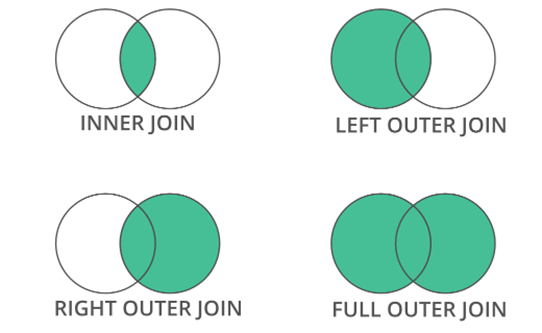

 ### Merging a dataframe with one unique key combination

In [1]:
# importing pandas module
import pandas as pd 
 
# Define a dictionary containing employee data 
data1 = {'key': ['K0', 'K1', 'K2', 'K3'],
         'Name':['Jai', 'Princi', 'Gaurav', 'Anuj'], 
        'Age':[27, 24, 22, 32],} 
   
# Define a dictionary containing employee data 
data2 = {'key': ['K0', 'K1', 'K2', 'K3'],
         'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'], 
        'Qualification':['Btech', 'B.A', 'Bcom', 'B.hons']} 
 
# Convert the dictionary into DataFrame  
df = pd.DataFrame(data1)
 
# Convert the dictionary into DataFrame  
df1 = pd.DataFrame(data2) 
  
 
print(df, "\n\n", df1) 


  key    Name  Age
0  K0     Jai   27
1  K1  Princi   24
2  K2  Gaurav   22
3  K3    Anuj   32 

   key    Address Qualification
0  K0     Nagpur         Btech
1  K1     Kanpur           B.A
2  K2  Allahabad          Bcom
3  K3    Kannuaj        B.hons


Now we are using .merge() with one unique key combination

In [2]:
# using .merge() function
res = pd.merge(df, df1, on='key')
 
res

,key,Name,Age,Address,Qualification
0,K0,Jai,27,Nagpur,Btech
1,K1,Princi,24,Kanpur,B.A
2,K2,Gaurav,22,Allahabad,Bcom
3,K3,Anuj,32,Kannuaj,B.hons


### Merging dataframe using multiple join keys.

In [3]:
# importing pandas module
import pandas as pd 
 
# Define a dictionary containing employee data 
data1 = {'key': ['K0', 'K1', 'K2', 'K3'],
         'key1': ['K0', 'K1', 'K0', 'K1'],
         'Name':['Jai', 'Princi', 'Gaurav', 'Anuj'], 
        'Age':[27, 24, 22, 32],} 
   
# Define a dictionary containing employee data 
data2 = {'key': ['K0', 'K1', 'K2', 'K3'],
         'key1': ['K0', 'K0', 'K0', 'K0'],
         'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'], 
        'Qualification':['Btech', 'B.A', 'Bcom', 'B.hons']} 
 
# Convert the dictionary into DataFrame  
df = pd.DataFrame(data1)
 
# Convert the dictionary into DataFrame  
df1 = pd.DataFrame(data2) 
  
 
print(df, "\n\n", df1) 


  key key1    Name  Age
0  K0   K0     Jai   27
1  K1   K1  Princi   24
2  K2   K0  Gaurav   22
3  K3   K1    Anuj   32 

   key key1    Address Qualification
0  K0   K0     Nagpur         Btech
1  K1   K0     Kanpur           B.A
2  K2   K0  Allahabad          Bcom
3  K3   K0    Kannuaj        B.hons


Now we merge dataframe using multiple keys

In [4]:
# merging dataframe using multiple keys
res1 = pd.merge(df, df1, on=['key', 'key1'])
 
res1

,key,key1,Name,Age,Address,Qualification
0,K0,K0,Jai,27,Nagpur,Btech
1,K2,K0,Gaurav,22,Allahabad,Bcom


## Merging dataframe using how in an argument:
We use how argument to merge specifies how to determine which keys are to be included in the resulting table. If a key combination does not appear in either the left or right tables, the values in the joined table will be NA. Here is a summary of the how options and their SQL equivalent names:

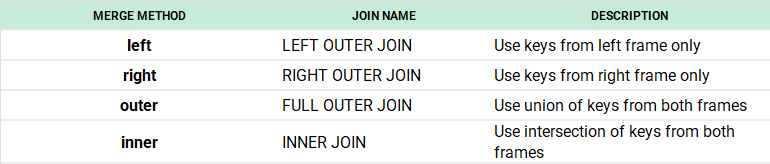

In [5]:
# importing pandas module
import pandas as pd 
 
# Define a dictionary containing employee data 
data1 = {'key': ['K0', 'K1', 'K2', 'K3'],
         'key1': ['K0', 'K1', 'K0', 'K1'],
         'Name':['Jai', 'Princi', 'Gaurav', 'Anuj'], 
        'Age':[27, 24, 22, 32],} 
   
# Define a dictionary containing employee data 
data2 = {'key': ['K0', 'K1', 'K2', 'K3'],
         'key1': ['K0', 'K0', 'K0', 'K0'],
         'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'], 
        'Qualification':['Btech', 'B.A', 'Bcom', 'B.hons']} 
 
# Convert the dictionary into DataFrame  
df = pd.DataFrame(data1)
 
# Convert the dictionary into DataFrame  
df1 = pd.DataFrame(data2) 
  
 
print(df, "\n\n", df1) 


  key key1    Name  Age
0  K0   K0     Jai   27
1  K1   K1  Princi   24
2  K2   K0  Gaurav   22
3  K3   K1    Anuj   32 

   key key1    Address Qualification
0  K0   K0     Nagpur         Btech
1  K1   K0     Kanpur           B.A
2  K2   K0  Allahabad          Bcom
3  K3   K0    Kannuaj        B.hons


Now we set how = 'left' in order to use keys from left frame only.

In [6]:
# using keys from left frame
res = pd.merge(df, df1, how='left', on=['key', 'key1'])
 
res

,key,key1,Name,Age,Address,Qualification
0,K0,K0,Jai,27,Nagpur,Btech
1,K1,K1,Princi,24,NaN,NaN
2,K2,K0,Gaurav,22,Allahabad,Bcom
3,K3,K1,Anuj,32,NaN,NaN


Now we set how = 'right' in order to use keys from right frame only.

In [8]:
# using keys from right frame
res1 = pd.merge(df, df1, how='right', on=['key', 'key1'])
 
res1

,key,key1,Address,Qualification,Name,Age
0,K0,K0,Nagpur,Btech,Jai,27
1,K1,K1,NaN,NaN,Princi,24
2,K2,K0,Allahabad,Bcom,Gaurav,22
3,K3,K1,NaN,NaN,Anuj,32


Now we set how = 'outer' in order to get union of keys from dataframes.

In [9]:
# getting union  of keys
res2 = pd.merge(df, df1, how='outer', on=['key', 'key1'])
 
res2

,key,key1,Name,Age,Address,Qualification
0,K0,K0,Jai,27.0,Nagpur,Btech
1,K1,K1,Princi,24.0,NaN,NaN
2,K2,K0,Gaurav,22.0,Allahabad,Bcom
3,K3,K1,Anuj,32.0,NaN,NaN
4,K1,K0,NaN,NaN,Kanpur,B.A
5,K3,K0,NaN,NaN,Kannuaj,B.hons


Now we set how = 'inner' in order to get intersection of keys from dataframes.

In [10]:
# getting intersection of keys
res3 = pd.merge(df, df1, how='inner', on=['key', 'key1'])
 
res3

,key,key1,Name,Age,Address,Qualification
0,K0,K0,Jai,27,Nagpur,Btech
1,K2,K0,Gaurav,22,Allahabad,Bcom
